<a href="https://colab.research.google.com/github/mmmshakeel/ml-feature-selection/blob/feature-selection-with-2-classes/Feature_selection_with_2_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from google.colab import drive
import pandas as pd
import numpy as np

In [ ]:
# Mount Google drive to load datasets
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load the dataset
df = pd.read_csv('/content/gdrive/MyDrive/[03] Study/Colab Notebooks/Datasets/CICIoT_2023_2_labels/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')

In [ ]:
# print the first few rows of the dataset
print(df.head())

   Unnamed: 0  flow_duration  Header_Length  Protocol Type  Duration  \
0           0       0.000000          54.00           6.00     64.00   
1           1       0.000000          57.04           6.33     64.00   
2           2       0.000000           0.00           1.00     64.00   
3           3       0.328175       76175.00          17.00     64.00   
4           4       0.117320         101.73           6.11     65.91   

          Rate        Srate  Drate  fin_flag_number  syn_flag_number  ...  \
0     0.329807     0.329807    0.0              1.0              0.0  ...   
1     4.290556     4.290556    0.0              0.0              0.0  ...   
2    33.396799    33.396799    0.0              0.0              0.0  ...   
3  4642.133010  4642.133010    0.0              0.0              0.0  ...   
4     6.202211     6.202211    0.0              0.0              1.0  ...   

         Std  Tot size           IAT  Number   Magnitue     Radius  \
0   0.000000     54.00  8.334383e+

In [ ]:
# Split the dataset into features and target variable
X = df.drop(['label'], axis=1)  # Features
y = df['label']  # Target variable

In [ ]:
# Apply SelectKBest class to extract top 10 features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)

# Get scores for each feature
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']  # Naming the dataframe columns

# Print the top 10 features
print(featureScores.nlargest(10, 'Score'))

          Feature         Score
2   Header_Length  4.074328e+10
44     Covariance  8.964241e+09
34        Tot sum  1.185127e+08
36            Max  2.368593e+07
19      rst_count  2.348470e+07
40            IAT  1.171697e+07
39       Tot size  1.137571e+07
37            AVG  1.131402e+07
35            Min  7.191372e+06
43         Radius  6.333474e+06


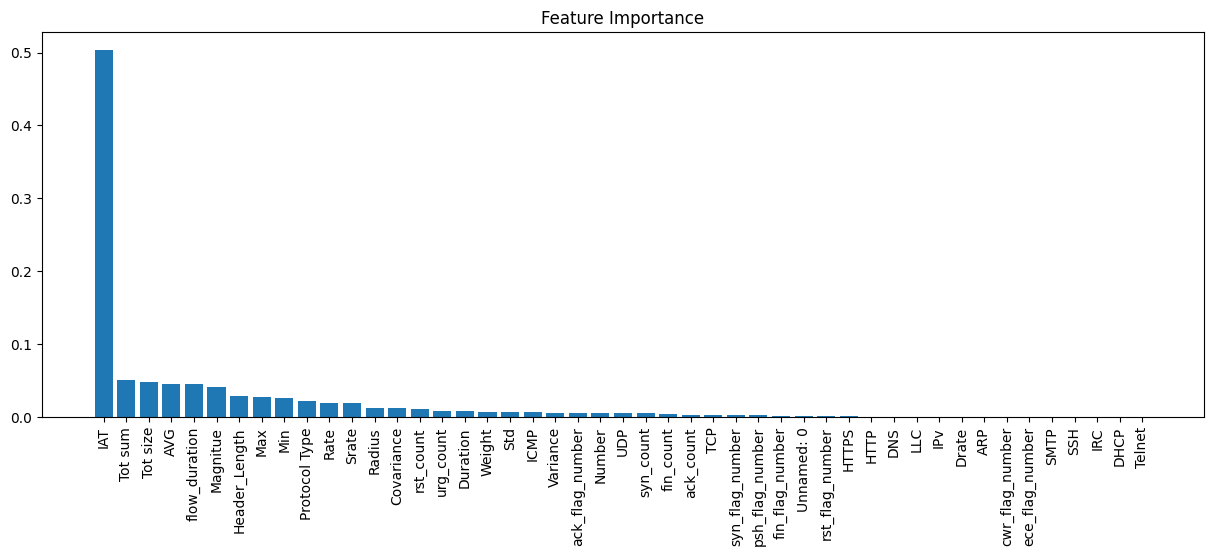

['IAT', 'Tot sum', 'Tot size', 'AVG', 'flow_duration', 'Magnitue', 'Header_Length', 'Max', 'Min', 'Protocol Type', 'Rate', 'Srate', 'Radius', 'Covariance', 'rst_count', 'urg_count', 'Duration', 'Weight', 'Std', 'ICMP', 'Variance', 'ack_flag_number', 'Number', 'UDP', 'syn_count', 'fin_count', 'ack_count', 'TCP', 'syn_flag_number', 'psh_flag_number', 'fin_flag_number', 'Unnamed: 0', 'rst_flag_number', 'HTTPS', 'HTTP', 'DNS', 'LLC', 'IPv', 'Drate', 'ARP', 'cwr_flag_number', 'ece_flag_number', 'SMTP', 'SSH', 'IRC', 'DHCP', 'Telnet']


In [ ]:
# Initialize and fit the model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Visualizing Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()
print(names)